## Objective

This is dataset containing over 21613 houses and their characteristics, the goal is to find the best model to predict a house’s price

### Instructions

    Explore this dataset using what you have learned in data preprocessing and data visualization 
    Write a paragraph selecting the most important features (feature selection). 
    Split your dataset into a training set and a testing set. 
    Apply Linear regression to your training set. 
    Plot the linear regression. 
    Measure the performance of linear regression using the testing set. 
    Apply multi-linear regression and compare it to the linear model.

In [102]:
# Loading Data

import pandas as pd

kc = pd.read_csv('kc_house_data.csv', parse_dates=['date'])

In [10]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Data Exploration

In [103]:
kc.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [104]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [12]:
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Feature selection 

In [13]:
import numpy as np

In [27]:
print(np.corrcoef(kc['price'], kc['bedrooms']))
print(np.corrcoef(kc['price'], kc['bathrooms']))
print(np.corrcoef(kc['price'], kc['sqft_living']))
print(np.corrcoef(kc['price'], kc['sqft_lot']))
print(np.corrcoef(kc['price'], kc['floors']))

[[1.        0.3083496]
 [0.3083496 1.       ]]
[[1.         0.52513751]
 [0.52513751 1.        ]]
[[1.         0.70203505]
 [0.70203505 1.        ]]
[[1.         0.08966086]
 [0.08966086 1.        ]]
[[1.         0.25679389]
 [0.25679389 1.        ]]


In [29]:
print(np.corrcoef(kc['price'], kc['waterfront']))
print(np.corrcoef(kc['price'], kc['view']))
print(np.corrcoef(kc['price'], kc['condition']))
print(np.corrcoef(kc['price'], kc['grade']))
print(np.corrcoef(kc['price'], kc['sqft_above']))

[[1.         0.26636943]
 [0.26636943 1.        ]]
[[1.         0.39729349]
 [0.39729349 1.        ]]
[[1.         0.03636179]
 [0.03636179 1.        ]]
[[1.         0.66743426]
 [0.66743426 1.        ]]
[[1.        0.6055673]
 [0.6055673 1.       ]]


In [31]:
print(np.corrcoef(kc['price'], kc['sqft_basement']))
print(np.corrcoef(kc['price'], kc['yr_built']))
print(np.corrcoef(kc['price'], kc['yr_renovated']))
print(np.corrcoef(kc['price'], kc['lat']))
print(np.corrcoef(kc['price'], kc['long']))
print(np.corrcoef(kc['price'], kc['sqft_living15']))


[[1.         0.32381602]
 [0.32381602 1.        ]]
[[1.         0.05401153]
 [0.05401153 1.        ]]
[[1.         0.12643379]
 [0.12643379 1.        ]]
[[1.         0.30700348]
 [0.30700348 1.        ]]
[[1.         0.02162624]
 [0.02162624 1.        ]]
[[1.        0.5853789]
 [0.5853789 1.       ]]


In [129]:
features = ['bathrooms', 'sqft_living', 'condition', 'sqft_above', 'sqft_living15', 'sqft_lot15'] # Based on coefficient of correlation
x_features = kc.loc[:, features]

y = kc['price'].values


### Linear Regression between price and bathroom

In [133]:
from sklearn.linear_model import LinearRegression


In [134]:
from sklearn.model_selection import train_test_split

In [ ]:
bath = x_features['bathrooms'].values.reshape(-1,1)

In [137]:
bath_train, bath_test, y_train, y_test = train_test_split(bath, y, test_size = 0.3, random_state = 45)

In [142]:
model = LinearRegression()
model_ = model.fit(bath_train, y_train)


In [143]:
print('Rsquare is ', model_.score(bath_train,y_train))
print('Intercept is ', model_.intercept_)
print('Weight is ', model_.coef_)

Rsquare is  0.27418138377151446
Intercept is  19490.62299094838
Weight is  [246327.04410621]


In [144]:
y_predict = model_.predict(bath_test)

In [148]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics


error = mean_squared_error(y_predict, y_test)
R2 = metrics.r2_score(y_predict, y_test)

print(error)
print(R2)

103849719574.34091
-1.86298141461966


### Plotting Linear Regression

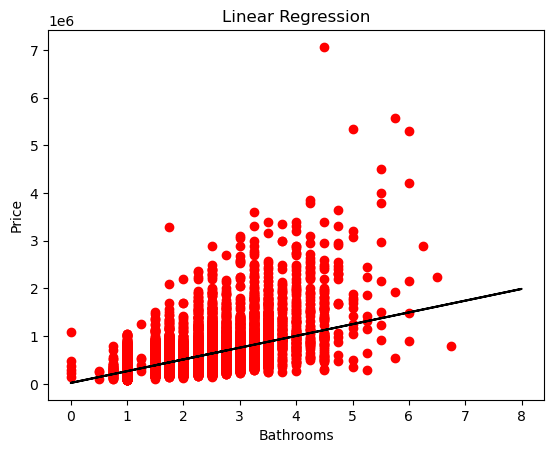

In [152]:
from matplotlib import pyplot as plt

plt.scatter(bath_train, y_train, color = 'r')

plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("Bathrooms")
plt.plot(bath_test,y_predict,color="k")
plt.show()

### Multi-Linear Regression

In [156]:
x = x_features.values

In [157]:
MLR = LinearRegression()

In [158]:
model = MLR.fit(x,y)

In [159]:
model.score(x,y)

0.5101093422148794

In [160]:
model.intercept_

-264886.6174063337

In [161]:
model.coef_

array([ 4.90547248e+02,  2.55821233e+02,  4.57640129e+04, -1.84199713e+01,
        7.95374757e+01, -7.23469310e-01])

In [54]:
# Model Equation 
# Price = 0.049bathrooms + 0.0255sqft_living + 0.00046condition -0.184sqft_above + 
# 0.795sqft_living15 - 0.723sqft_lot15 - 264886.62

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 45)

In [163]:
model_train = LinearRegression()
Mod = model_train.fit(x_train, y_train)

In [164]:
Predict = Mod.predict(x_test)

In [165]:
MSE = mean_squared_error(y_test, Predict)
MSE

69949278790.87701

In [166]:
R_squared = metrics.r2_score(y_test,Predict)
R_squared

0.514297155580443

In [168]:
from sklearn.preprocessing import PolynomialFeatures

In [169]:
pol = PolynomialFeatures(degree = 2)

In [170]:
x_ = pol.fit_transform(x_train)

In [171]:
model3 = LinearRegression()
model_pol = model3.fit(x_, y_train)

In [172]:
model_pol.score(x_, y_train)

0.5987378935540215

In [173]:
model_pol.coef_

array([-6.83788330e-03, -7.33777956e+04,  5.75498078e+01, -2.44024660e+05,
       -8.48506095e+01, -3.28842580e+02,  2.02222414e+00,  2.56514887e+04,
       -7.33687448e+00,  3.57944231e+03,  1.24054579e+01, -2.23487644e+01,
        3.87961662e-01, -6.06022915e-02, -1.81342084e+01,  2.68733431e-01,
        1.88100944e-02, -2.25224691e-03,  1.21229682e+04,  3.10572508e+01,
        1.03288820e+02, -9.68238529e-01, -1.56402686e-01, -6.02991252e-02,
        1.49961766e-03,  5.07221647e-02,  2.33058647e-04,  5.93535893e-06])

In [174]:
x_test_ = pol.fit_transform(x_test)

In [175]:
pol_predict = model_pol.predict(x_test_)

In [176]:
MSE = mean_squared_error(pol_predict, y_test)
MSE

59171814462.08976